In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('haberman.csv', header = 0)
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

#Exploring data

In [19]:
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [20]:
df.shape

(305, 4)

In [22]:
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [24]:
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})

#General statistical analysis

In [25]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [26]:
survival_yes = df[df['survival_status'] == 'yes']
survival_yes.describe()

,patient_age,operation_year,positive_axillary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


#Uni-variate data analysis

##Distribution Plots

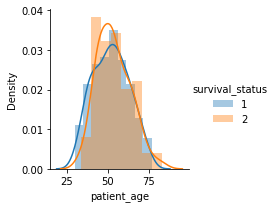

In [9]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "patient_age").add_legend()
plt.show()

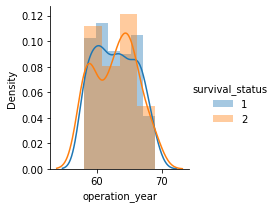

In [10]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "operation_year").add_legend()
plt.show()

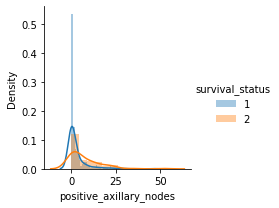

In [11]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "positive_axillary_nodes").add_legend()
plt.show()

##Box plots and Violin plots

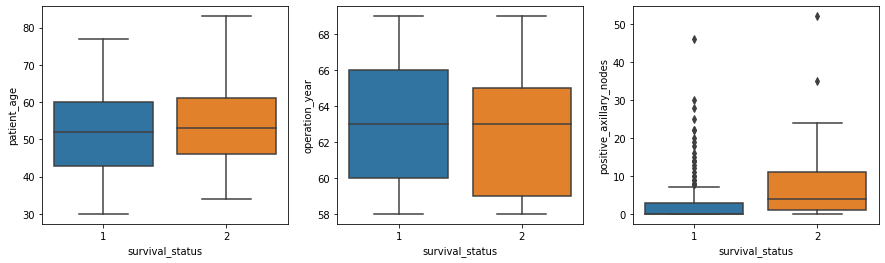

In [12]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status', y = 'operation_year', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df)
plt.show()

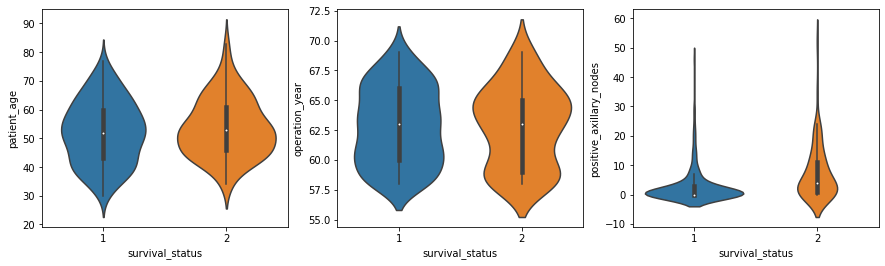

In [13]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.violinplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'survival_status', y = 'operation_year', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df)
plt.show()

#Bi-variate data analysis

##Pair plot

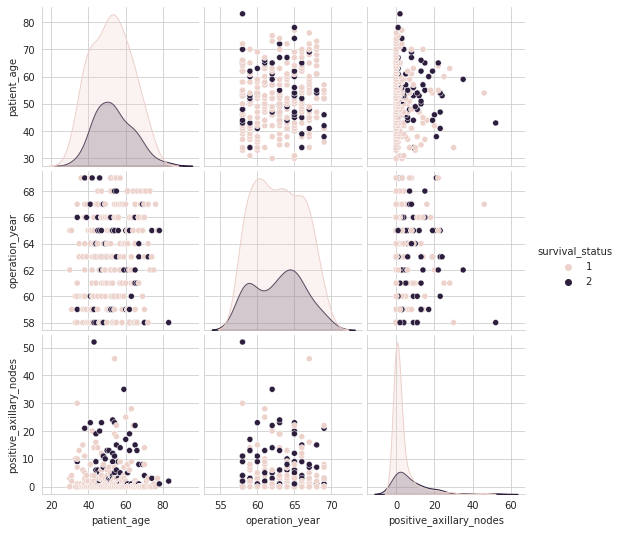

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status')
plt.show()

##Joint plot

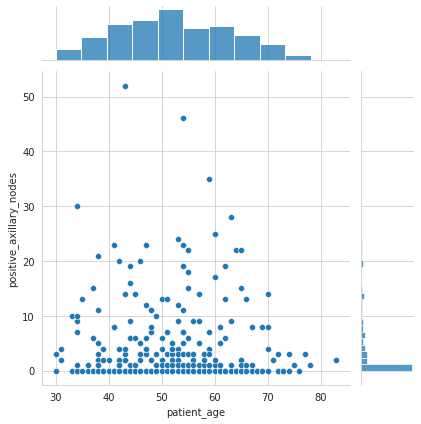

In [15]:
sns.jointplot(x = 'patient_age', y = 'positive_axillary_nodes', data = df)
plt.show()

##Heatmap

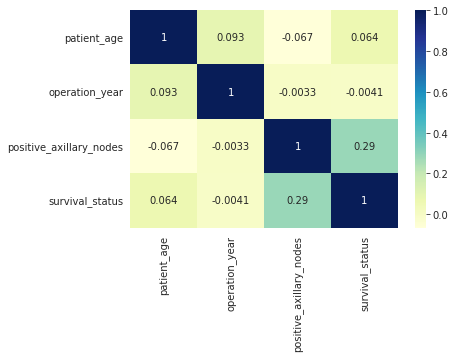

In [17]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

#Multivariate analysis with Contour plot

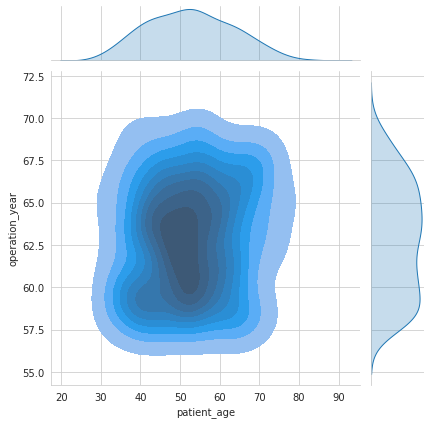

In [18]:
sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
plt.show()